In [25]:
pwd

'/home/wsuser/work'

In [26]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_520603f795bd4c36bda2fa2f9d06f6a8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Z7FhoL0Uz9mKepzPieFt8TPouKLVCTnph1c-wKY4nX36',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_5 = client_520603f795bd4c36bda2fa2f9d06f6a8.get_object(Bucket='veganalysis-donotdelete-pr-mgno2nzecteeky', Key='Veg-dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


# Unzip the folder

In [27]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_5.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [28]:
ls

Veg-dataset/


In [29]:
pwd

'/home/wsuser/work'

# Image Augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [32]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [33]:
ls

Veg-dataset/


In [34]:
pwd

'/home/wsuser/work'

In [49]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Veg-dataset/train_set",target_size=(128,128),class_mode='categorical',batch_size=200)

Found 11386 images belonging to 9 classes.


In [50]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Veg-dataset/test_set",target_size=(128,128),class_mode='categorical',batch_size=50)

Found 3416 images belonging to 9 classes.


In [51]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [53]:
model=Sequential()

In [54]:
model.add(Convolution2D(64,(3,3),input_shape=(128,128,3),activation='relu'))

In [55]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
model.add(Flatten())

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 254016)            0         
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


# Hidden Layer

In [58]:
model.add(Dense(150,activation='relu'))
model.add(Dense(50,activation='relu'))

# Output Layer

In [59]:
model.add(Dense(9,activation='softmax')) # 9 is the number of catagories
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
len(x_train)
# NUMBER OF IMAGES DIVIDED BY BATCH SIZE

57

In [61]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/tmp/wsuser/ipykernel_164/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
57/57 [==============================] - 293s 5s/step - loss: 2.5851 - accuracy: 0.3626 - val_loss: 1.2131 - val_accuracy: 0.6004
Epoch 2/10
57/57 [==============================] - 291s 5s/step - loss: 0.8067 - accuracy: 0.7240 - val_loss: 0.8646 - val_accuracy: 0.7005
Epoch 3/10
57/57 [==============================] - 291s 5s/step - loss: 0.5789 - accuracy: 0.7987 - val_loss: 0.5146 - val_accuracy: 0.8121
Epoch 4/10
57/57 [==============================] - 292s 5s/step - loss: 0.4309 - accuracy: 0.8513 - val_loss: 0.4506 - val_accuracy: 0.8372
Epoch 5/10
57/57 [==============================] - 293s 5s/step - loss: 0.3542 - accuracy: 0.8787 - val_loss: 0.3605 - val_accuracy: 0.8715
Epoch 6/10
57/57 [==============================] - 292s 5s/step - loss: 0.2973 - accuracy: 0.8987 - val_loss: 0.2935 - val_accuracy: 0.8949
Epoch 7/10
57/57 [==============================] - 292s 5s/step - loss: 0.2778 - accuracy: 0.9060 - val_loss: 0.3662 - val_accuracy: 0.8665
Epoch 8/10
57

In [62]:
ls

Veg-dataset/


In [96]:
model.save('Veg-model.h5')

In [97]:
ls

fruit-model.h5  fruit-model.tar.gb  fruit-model.tgz  Veg-dataset/  Veg-model.h5


# Test the Model

In [99]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [100]:
# Load the model
model=load_model('Veg-model.h5')

In [101]:
pwd

'/home/wsuser/work'

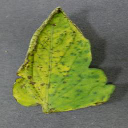

In [102]:
img=image.load_img(r"/home/wsuser/work/Veg-dataset/test_set/Tomato___Bacterial_spot/b6d72c2e-9e41-4215-af23-8e84d94d839f___UF.GRC_BS_Lab Leaf 9065.JPG",target_size=(128,128))
img

In [103]:
x=image.img_to_array(img)
x

array([[[125., 126., 128.],
        [126., 127., 129.],
        [124., 125., 127.],
        ...,
        [118., 119., 123.],
        [116., 117., 121.],
        [110., 111., 115.]],

       [[126., 127., 129.],
        [126., 127., 129.],
        [123., 124., 126.],
        ...,
        [115., 116., 120.],
        [115., 116., 120.],
        [112., 113., 117.]],

       [[129., 130., 132.],
        [127., 128., 130.],
        [121., 122., 124.],
        ...,
        [119., 120., 124.],
        [119., 120., 124.],
        [117., 118., 122.]],

       ...,

       [[121., 123., 122.],
        [128., 130., 129.],
        [123., 125., 124.],
        ...,
        [ 99.,  99.,  97.],
        [103., 103., 101.],
        [109., 109., 107.]],

       [[115., 117., 116.],
        [112., 114., 113.],
        [109., 111., 110.],
        ...,
        [111., 111., 109.],
        [111., 111., 109.],
        [107., 107., 105.]],

       [[119., 121., 120.],
        [121., 123., 122.],
        [123., 1

In [104]:
x=np.expand_dims(x,axis=0)

In [105]:
x

array([[[[125., 126., 128.],
         [126., 127., 129.],
         [124., 125., 127.],
         ...,
         [118., 119., 123.],
         [116., 117., 121.],
         [110., 111., 115.]],

        [[126., 127., 129.],
         [126., 127., 129.],
         [123., 124., 126.],
         ...,
         [115., 116., 120.],
         [115., 116., 120.],
         [112., 113., 117.]],

        [[129., 130., 132.],
         [127., 128., 130.],
         [121., 122., 124.],
         ...,
         [119., 120., 124.],
         [119., 120., 124.],
         [117., 118., 122.]],

        ...,

        [[121., 123., 122.],
         [128., 130., 129.],
         [123., 125., 124.],
         ...,
         [ 99.,  99.,  97.],
         [103., 103., 101.],
         [109., 109., 107.]],

        [[115., 117., 116.],
         [112., 114., 113.],
         [109., 111., 110.],
         ...,
         [111., 111., 109.],
         [111., 111., 109.],
         [107., 107., 105.]],

        [[119., 121., 120.],
       

In [106]:
y=np.argmax(model.predict(x),axis=1)

In [107]:
y

array([0])

In [108]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [109]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

In [110]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'

In [111]:
img=image.load_img(r"/home/wsuser/work/Veg-dataset/test_set/Potato___Early_blight/bc8a7fa5-1f77-4829-a1ee-0ccbeef289eb___RS_Early.B 7228.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'

# IBM Deployment

In [112]:
!pip install watson-machine-learning-client

In [113]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"6Nog_LsS2bKRhyx-TXVzEcTnb-yakzm3pPDo82orK0st"    
}

In [114]:
client=APIClient(wml_credentials)

In [115]:
client

In [116]:
def guid_space_name(client,IBM_Deployment_Veg_Disease):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==IBM_Deployment_Veg_Disease)['metadata']['id'])

In [117]:
space_uid=guid_space_name(client,'IBM_Deployment_Veg_Disease')
print(space_uid)

4805df2f-a34c-4619-8d3b-719728fdfe6b


In [118]:
client.set.default_space(space_uid)

'SUCCESS'

In [119]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [120]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [121]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [122]:
ls

fruit-model.h5  fruit-model.tar.gb  fruit-model.tgz  Veg-dataset/  Veg-model.h5


In [123]:
!tar -zcvf Veg-model.tgz Veg-model.h5

Veg-model.h5


In [125]:
ls

fruit-model.h5      fruit-model.tgz  Veg-model.h5
fruit-model.tar.gb  Veg-dataset/     Veg-model.tgz


In [ ]:
model_details=client.repository.store_model(model='Veg-model.tgz',
    meta_props={
                client.repository.ModelMetaNames.NAME:"CNN_Model",
                client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
                client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
    })

In [127]:
model_id=client.repository.get_model_id(model_details)

In [128]:
model_id

'643358aa-3343-4915-9d3e-f2948c40a876'

In [94]:
client.repository.download(model_id,'fruit-model.tar.gb')

Successfully saved model content to file: 'fruit-model.tar.gb'


'/home/wsuser/work/fruit-model.tar.gb'

In [95]:
ls

fruit-model.h5  fruit-model.tar.gb  fruit-model.tgz  Veg-dataset/
